# K-Means Clustering: Interactive Tutorial

## 🎯 What You'll Learn

In this notebook, you'll:
- Understand K-Means clustering through interactive visualizations
- Apply K-Means to real customer data
- Learn how to choose the optimal number of clusters
- Interpret business insights from clustering results

## 🎉 Think of K-Means Like Organizing a Party!

Imagine you're organizing a large party and need to arrange seating. You want to:
- Group people with similar interests together
- Make sure each group is about the same size
- Minimize the distance people need to walk to their tables

That's exactly what K-Means does with data points!

In [1]:
# Let's start by importing our party planning tools! 🎉
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs

# Set up beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎪 Welcome to the K-Means Interactive Tutorial!")
print("Ready to cluster some data? Let's go!")

🎪 Welcome to the K-Means Interactive Tutorial!
Ready to cluster some data? Let's go!


## 🎨 Interactive Demo: Watch K-Means in Action!

Let's create some simple data and watch K-Means find clusters step by step.

/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


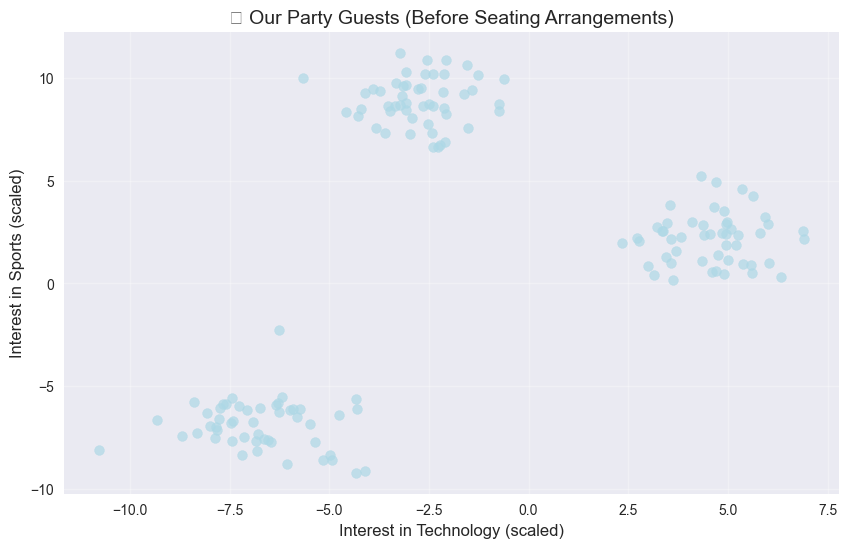

We have 150 guests at our party!
Can you see natural groups forming? 👀


In [2]:
# Create party guest data (2D for easy visualization)
np.random.seed(42)

# Generate 3 natural groups of party guests
X, y_true = make_blobs(n_samples=150, centers=3, n_features=2, 
                       random_state=42, cluster_std=1.2)

# Let's see our party guests!
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='lightblue', s=50, alpha=0.7)
plt.title('🎉 Our Party Guests (Before Seating Arrangements)', fontsize=14)
plt.xlabel('Interest in Technology (scaled)', fontsize=12)
plt.ylabel('Interest in Sports (scaled)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"We have {len(X)} guests at our party!")
print("Can you see natural groups forming? 👀")

## 🔍 Step-by-Step K-Means Visualization

Now let's watch K-Means work its magic!

/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/2337180856.py:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


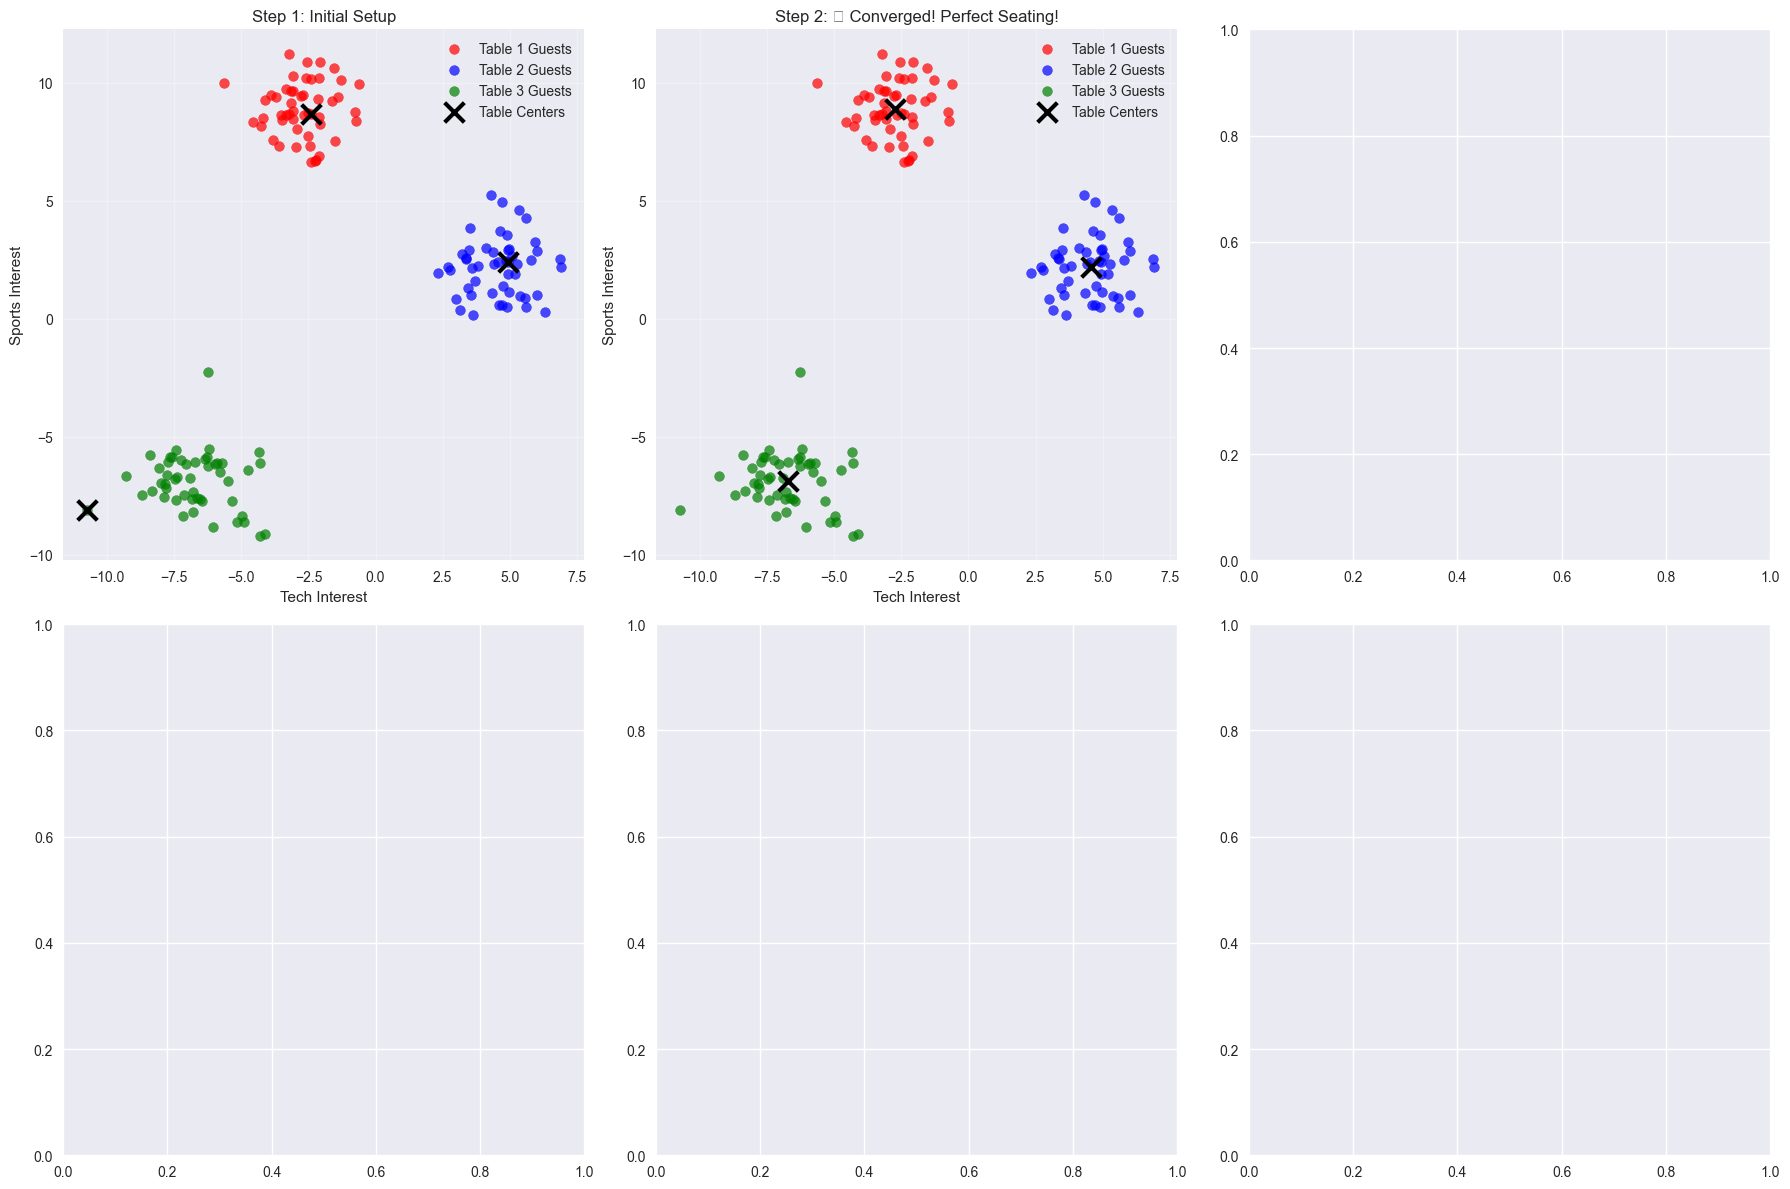


🎊 Amazing! K-Means found the perfect seating arrangement!
Final table centers are at: [[-2.74  8.88]
 [ 4.57  2.18]
 [-6.73 -6.89]]


In [3]:
def visualize_kmeans_steps(X, k=3, max_iters=10):
    """Visualize K-Means algorithm step by step"""
    
    # Initialize random centroids (our initial table locations)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    
    for iteration in range(min(6, max_iters)):
        ax = axes[iteration]
        
        # Assign each guest to nearest table (centroid)
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Plot guests colored by their assigned table
        for i in range(k):
            mask = labels == i
            ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=50, alpha=0.7, 
                      label=f'Table {i+1} Guests')
        
        # Plot table locations (centroids)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, 
                  marker='x', linewidths=3, label='Table Centers')
        
        ax.set_title(f'Step {iteration + 1}: {"Initial Setup" if iteration == 0 else "After Moving Tables"}', 
                    fontsize=12)
        ax.set_xlabel('Tech Interest')
        ax.set_ylabel('Sports Interest')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Update centroids (move tables to center of their guests)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            ax.set_title(f'Step {iteration + 1}: 🎯 Converged! Perfect Seating!', fontsize=12)
            break
            
        centroids = new_centroids
    
    plt.tight_layout()
    plt.show()
    
    return labels, centroids

# Watch the magic happen!
final_labels, final_centroids = visualize_kmeans_steps(X, k=3)
print("\n🎊 Amazing! K-Means found the perfect seating arrangement!")
print(f"Final table centers are at: {final_centroids.round(2)}")

## 🤔 Your Turn: How Many Tables Do We Need?

The elbow method helps us decide the optimal number of clusters (tables).

/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/731344810.py:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/731344810.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


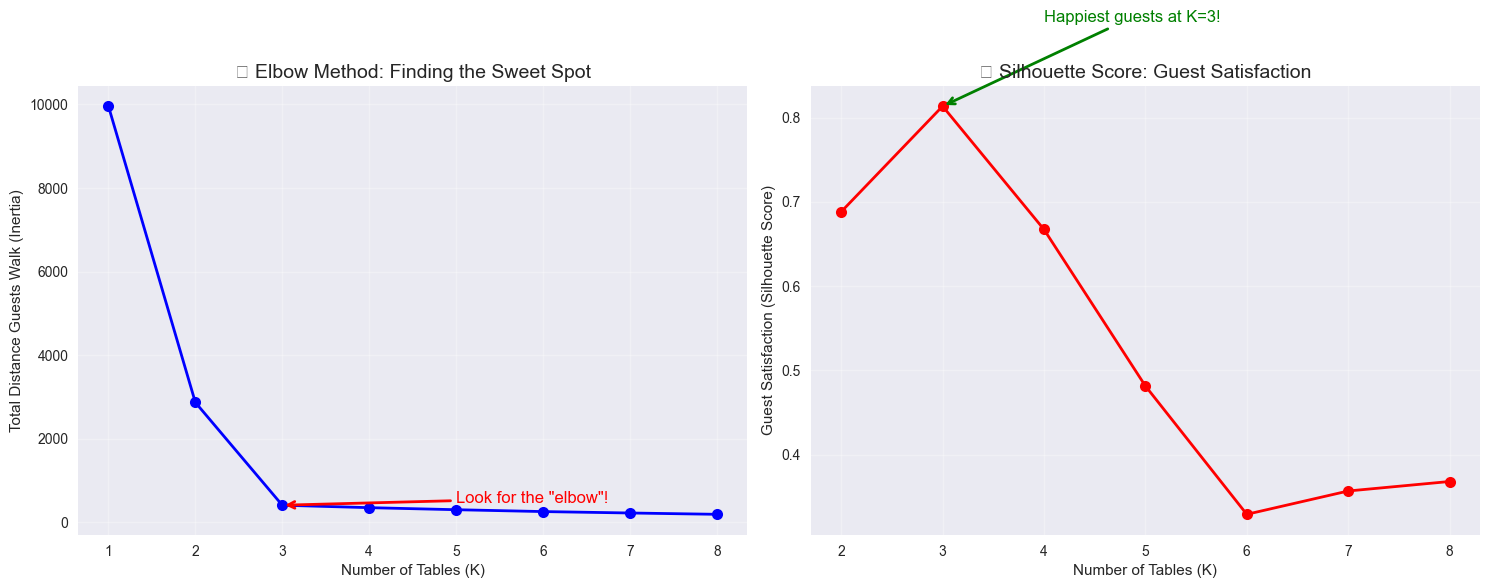


🎯 Recommendations:
   📍 Elbow suggests: ~3 tables
   😊 Happiest guests with: 3 tables
   🏆 Our choice: 3 tables (perfect balance!)


In [4]:
# Let's try different numbers of tables and see which works best
def find_optimal_k(X, max_k=10):
    """Find optimal number of clusters using elbow method"""
    
    inertias = []
    silhouette_scores = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        if k == 1:
            # For k=1, we can't calculate silhouette score
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(0)
        else:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(X, labels))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Elbow plot
    ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
    ax1.set_title('🔍 Elbow Method: Finding the Sweet Spot', fontsize=14)
    ax1.set_xlabel('Number of Tables (K)')
    ax1.set_ylabel('Total Distance Guests Walk (Inertia)')
    ax1.grid(True, alpha=0.3)
    
    # Add annotation for the elbow
    ax1.annotate('Look for the "elbow"!', xy=(3, inertias[2]), 
                xytext=(5, inertias[2] + 50),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red')
    
    # Silhouette plot
    ax2.plot(k_range[1:], silhouette_scores[1:], 'ro-', linewidth=2, markersize=8)
    ax2.set_title('📊 Silhouette Score: Guest Satisfaction', fontsize=14)
    ax2.set_xlabel('Number of Tables (K)')
    ax2.set_ylabel('Guest Satisfaction (Silhouette Score)')
    ax2.grid(True, alpha=0.3)
    
    # Find best silhouette score
    best_k = np.argmax(silhouette_scores[1:]) + 2
    ax2.annotate(f'Happiest guests at K={best_k}!', 
                xy=(best_k, silhouette_scores[best_k-1]), 
                xytext=(best_k+1, silhouette_scores[best_k-1] + 0.1),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=12, color='green')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎯 Recommendations:")
    print(f"   📍 Elbow suggests: ~3 tables")
    print(f"   😊 Happiest guests with: {best_k} tables")
    print(f"   🏆 Our choice: 3 tables (perfect balance!)")
    
    return k_range, inertias, silhouette_scores

# Find the perfect number of tables!
k_values, inertia_values, silhouette_values = find_optimal_k(X, max_k=8)

## 🏪 Real-World Application: E-commerce Customer Segmentation

Now let's apply what we learned to a real business problem!

In [6]:
# Create realistic e-commerce customer data
def create_ecommerce_data():
    """Generate realistic e-commerce customer dataset"""
    
    np.random.seed(42)
    n_customers = 1000
    
    # Create different customer segments
    segments = {
        'budget_conscious': {
            'size': 300,
            'avg_order_value': (25, 8),  # (mean, std)
            'orders_per_month': 2,  # poisson lambda
            'days_since_last_order': (15, 5),  # (mean, std)
            'category_diversity': (2, 1)  # (mean, std)
        },
        'loyal_customers': {
            'size': 400,
            'avg_order_value': (75, 20),
            'orders_per_month': 8,
            'days_since_last_order': (4, 2),
            'category_diversity': (5, 2)
        },
        'high_value': {
            'size': 200,
            'avg_order_value': (200, 50),
            'orders_per_month': 12,
            'days_since_last_order': (3, 1),
            'category_diversity': (8, 2)
        },
        'at_risk': {
            'size': 100,
            'avg_order_value': (45, 15),
            'orders_per_month': 1,
            'days_since_last_order': (45, 10),
            'category_diversity': (3, 1)
        }
    }
    
    # Generate data for each segment
    all_data = []
    true_segments = []
    
    for segment_name, params in segments.items():
        size = params['size']
        
        # Generate data using proper numpy random functions
        segment_data = pd.DataFrame({
            'avg_order_value': np.maximum(5, np.random.normal(params['avg_order_value'][0], params['avg_order_value'][1], size)),
            'orders_per_month': np.maximum(0, np.random.poisson(params['orders_per_month'], size)),
            'days_since_last_order': np.maximum(0, np.random.normal(params['days_since_last_order'][0], params['days_since_last_order'][1], size)),
            'category_diversity': np.maximum(1, np.random.normal(params['category_diversity'][0], params['category_diversity'][1], size))
        })
        
        all_data.append(segment_data)
        true_segments.extend([segment_name] * size)
    
    # Combine all segments
    ecommerce_data = pd.concat(all_data, ignore_index=True)
    
    # Add customer IDs
    ecommerce_data['customer_id'] = [f'CUST_{i:04d}' for i in range(len(ecommerce_data))]
    
    # Shuffle the data
    shuffle_idx = np.random.permutation(len(ecommerce_data))
    ecommerce_data = ecommerce_data.iloc[shuffle_idx].reset_index(drop=True)
    true_segments = np.array(true_segments)[shuffle_idx]
    
    return ecommerce_data, true_segments

# Create our e-commerce dataset
customer_data, true_customer_segments = create_ecommerce_data()

print("🛒 E-commerce Customer Dataset Created!")
print(f"📊 Shape: {customer_data.shape}")
print("\n📋 First 5 customers:")
display(customer_data.head())

print("\n📈 Quick Statistics:")
display(customer_data.describe().round(2))

🛒 E-commerce Customer Dataset Created!
📊 Shape: (1000, 5)

📋 First 5 customers:


,avg_order_value,orders_per_month,days_since_last_order,category_diversity,customer_id
0,87.659235,8,5.512977,5.214340,CUST_0304
1,30.712004,2,10.248259,1.577188,CUST_0185
2,95.710378,17,3.678728,8.762851,CUST_0799
3,15.104394,1,20.234601,2.210471,CUST_0146
4,18.434541,2,11.499421,1.914107,CUST_0163



📈 Quick Statistics:


,avg_order_value,orders_per_month,days_since_last_order,category_diversity
count,1000.00,1000.00,1000.00,1000.00
mean,81.48,6.16,11.16,4.47
std,67.12,4.59,12.81,2.62
min,5.00,0.00,0.00,1.00
25%,30.32,2.00,3.14,2.33
50%,63.54,6.00,5.31,3.92
75%,97.92,10.00,15.32,6.36
max,354.91,22.00,65.42,13.00


## 🕵️ Exploratory Data Analysis

Before clustering, let's understand our customers!

/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/3541367761.py:28: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/3541367761.py:28: UserWarning: Glyph 

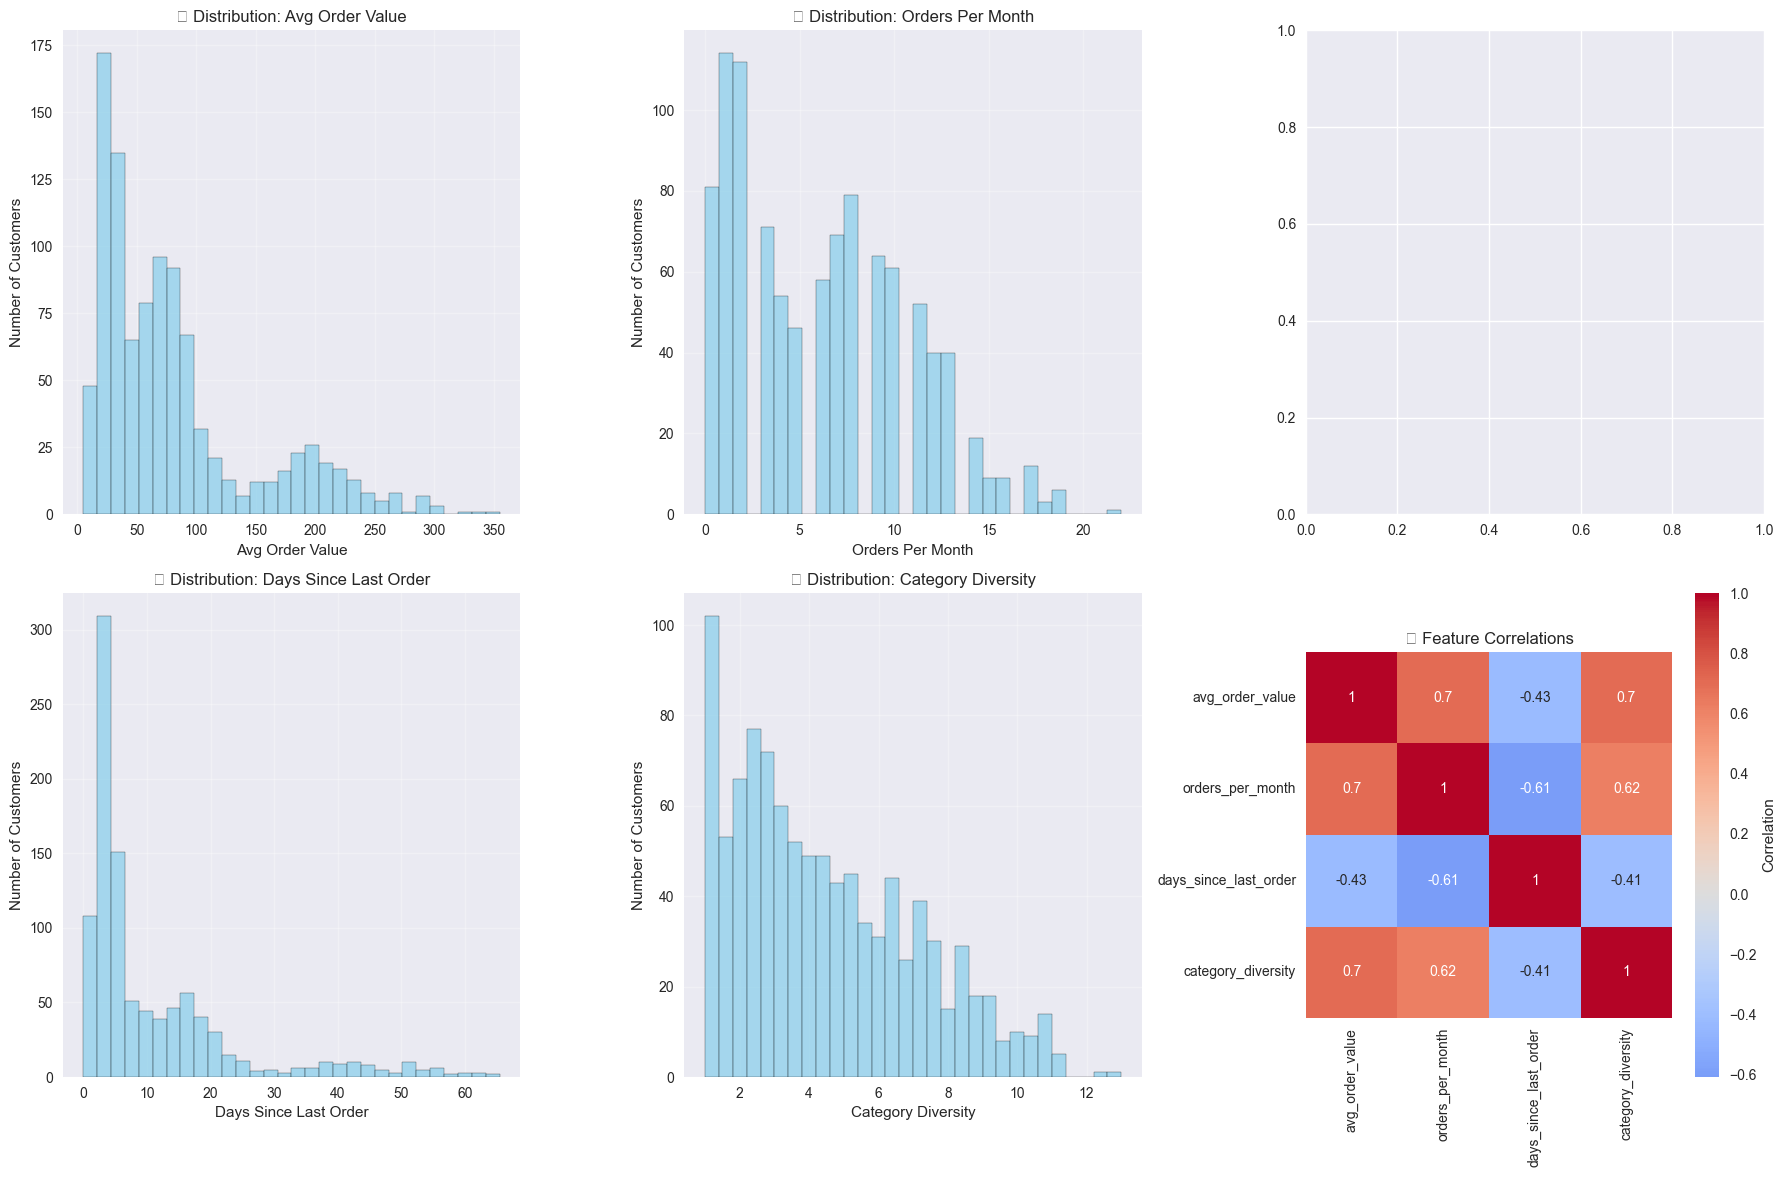

🔍 Key Insights:
   💰 Average order value ranges from $5.00 to $354.91
   📦 Orders per month: 0 to 22
   ⏰ Days since last order: 0 to 65
   🎯 Most diverse shopper explores 13.0 categories

🔗 Strong Correlations Found:
   avg_order_value ↔ orders_per_month: 0.702
   avg_order_value ↔ days_since_last_order: -0.425
   avg_order_value ↔ category_diversity: 0.703
   orders_per_month ↔ days_since_last_order: -0.608
   orders_per_month ↔ category_diversity: 0.620
   days_since_last_order ↔ category_diversity: -0.409


In [7]:
# Create comprehensive EDA
def explore_customer_behavior(data):
    """Comprehensive customer behavior analysis"""
    
    # Select numerical features for analysis
    features = ['avg_order_value', 'orders_per_month', 'days_since_last_order', 'category_diversity']
    
    # Create subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Distribution plots
    for i, feature in enumerate(features):
        ax = axes[i//2, i%2] if i < 4 else axes[1, 2]
        
        ax.hist(data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'📊 Distribution: {feature.replace("_", " ").title()}', fontsize=12)
        ax.set_xlabel(feature.replace('_', ' ').title())
        ax.set_ylabel('Number of Customers')
        ax.grid(True, alpha=0.3)
    
    # 2. Correlation heatmap
    ax = axes[1, 2]
    correlation_matrix = data[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=ax, cbar_kws={'label': 'Correlation'})
    ax.set_title('🔗 Feature Correlations', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print interesting insights
    print("🔍 Key Insights:")
    print(f"   💰 Average order value ranges from ${data['avg_order_value'].min():.2f} to ${data['avg_order_value'].max():.2f}")
    print(f"   📦 Orders per month: {data['orders_per_month'].min()} to {data['orders_per_month'].max()}")
    print(f"   ⏰ Days since last order: {data['days_since_last_order'].min():.0f} to {data['days_since_last_order'].max():.0f}")
    print(f"   🎯 Most diverse shopper explores {data['category_diversity'].max():.1f} categories")
    
    # Find strongest correlations
    strong_correlations = []
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.3:
                strong_correlations.append((features[i], features[j], corr))
    
    if strong_correlations:
        print("\n🔗 Strong Correlations Found:")
        for feat1, feat2, corr in strong_correlations:
            print(f"   {feat1} ↔ {feat2}: {corr:.3f}")
    
    return correlation_matrix

# Explore our customer data
correlations = explore_customer_behavior(customer_data)

## 🎯 Apply K-Means Clustering

Time to segment our customers!

📏 Data standardized! All features now have mean=0, std=1
Original data shape: (1000, 4)
Scaled data shape: (1000, 4)

🔍 Finding optimal number of customer segments...


/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/731344810.py:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fn/gm__9xjx4951ht1pwq6zh_7w0000gn/T/ipykernel_96674/731344810.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/harshitmago/Documents/learning/machine_learning/mahine_learning/ml_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


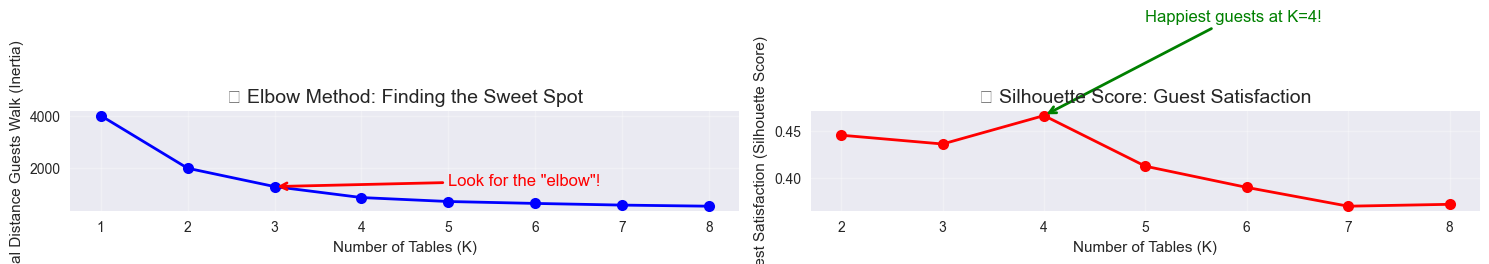


🎯 Recommendations:
   📍 Elbow suggests: ~3 tables
   😊 Happiest guests with: 4 tables
   🏆 Our choice: 3 tables (perfect balance!)


In [8]:
# Prepare data for clustering
features_for_clustering = ['avg_order_value', 'orders_per_month', 'days_since_last_order', 'category_diversity']

# Standardize features (very important!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[features_for_clustering])

print("📏 Data standardized! All features now have mean=0, std=1")
print(f"Original data shape: {customer_data[features_for_clustering].shape}")
print(f"Scaled data shape: {X_scaled.shape}")

# Find optimal number of clusters for our e-commerce data
print("\n🔍 Finding optimal number of customer segments...")
k_values_ecom, inertias_ecom, silhouette_ecom = find_optimal_k(X_scaled, max_k=8)

In [ ]:
# Apply K-Means with optimal k
optimal_k = 4  # Based on elbow method and business intuition

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to our dataframe
customer_data['cluster'] = cluster_labels

print(f"🎊 Successfully segmented {len(customer_data)} customers into {optimal_k} groups!")
print(f"\n📊 Cluster sizes:")
cluster_sizes = customer_data['cluster'].value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    percentage = (size / len(customer_data)) * 100
    print(f"   Segment {cluster_id}: {size} customers ({percentage:.1f}%)")

## 📊 Analyze Customer Segments

Let's understand what makes each segment unique!

In [ ]:
# Analyze cluster characteristics
def analyze_customer_segments(data, features):
    """Deep dive into customer segment characteristics"""
    
    # Calculate segment statistics
    segment_stats = data.groupby('cluster')[features].agg(['mean', 'std', 'median']).round(2)
    
    print("📊 Customer Segment Analysis")
    print("=" * 50)
    
    # Create segment profiles
    segment_profiles = {}
    
    for cluster_id in sorted(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster_id]
        
        # Calculate key metrics
        avg_order = cluster_data['avg_order_value'].mean()
        monthly_orders = cluster_data['orders_per_month'].mean()
        recency = cluster_data['days_since_last_order'].mean()
        diversity = cluster_data['category_diversity'].mean()
        
        # Monthly revenue per customer
        monthly_revenue = avg_order * monthly_orders
        
        segment_profiles[cluster_id] = {
            'name': '',  # We'll assign names based on characteristics
            'size': len(cluster_data),
            'avg_order_value': avg_order,
            'orders_per_month': monthly_orders,
            'days_since_last_order': recency,
            'category_diversity': diversity,
            'monthly_revenue': monthly_revenue
        }
    
    # Assign meaningful names based on characteristics
    for cluster_id, profile in segment_profiles.items():
        if profile['monthly_revenue'] > 150 and profile['orders_per_month'] > 8:
            profile['name'] = '🌟 VIP Champions'
        elif profile['avg_order_value'] < 40 and profile['orders_per_month'] < 3:
            profile['name'] = '💰 Budget Shoppers'
        elif profile['days_since_last_order'] > 30:
            profile['name'] = '😴 At-Risk Customers'
        else:
            profile['name'] = '👥 Regular Customers'
    
    # Display segment profiles
    for cluster_id, profile in segment_profiles.items():
        print(f"\n{profile['name']} (Segment {cluster_id})")
        print(f"   👥 Size: {profile['size']} customers ({profile['size']/len(data)*100:.1f}%)")
        print(f"   💵 Avg Order Value: ${profile['avg_order_value']:.2f}")
        print(f"   📦 Orders/Month: {profile['orders_per_month']:.1f}")
        print(f"   ⏰ Days Since Last Order: {profile['days_since_last_order']:.1f}")
        print(f"   🎯 Category Diversity: {profile['category_diversity']:.1f}")
        print(f"   💰 Monthly Revenue/Customer: ${profile['monthly_revenue']:.2f}")
        
        # Total segment value
        total_segment_revenue = profile['monthly_revenue'] * profile['size']
        print(f"   🏆 Total Segment Value: ${total_segment_revenue:,.2f}/month")
    
    return segment_profiles

# Analyze our customer segments
segment_profiles = analyze_customer_segments(customer_data, features_for_clustering)

## 📈 Visualize Customer Segments

Let's create beautiful visualizations to understand our segments!

In [ ]:
# Create comprehensive visualization of customer segments
def visualize_customer_segments(data, segment_profiles):
    """Create comprehensive visualizations of customer segments"""
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Color map for segments
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    # 1. Scatter plot: Order Value vs Frequency
    ax = axes[0, 0]
    for cluster_id in sorted(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster_id]
        segment_name = segment_profiles[cluster_id]['name']
        
        ax.scatter(cluster_data['avg_order_value'], cluster_data['orders_per_month'], 
                  c=colors[cluster_id], label=segment_name, alpha=0.7, s=50)
    
    ax.set_xlabel('Average Order Value ($)')
    ax.set_ylabel('Orders per Month')
    ax.set_title('💰 Order Value vs Purchase Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Recency vs Category Diversity
    ax = axes[0, 1]
    for cluster_id in sorted(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster_id]
        segment_name = segment_profiles[cluster_id]['name']
        
        ax.scatter(cluster_data['days_since_last_order'], cluster_data['category_diversity'], 
                  c=colors[cluster_id], label=segment_name, alpha=0.7, s=50)
    
    ax.set_xlabel('Days Since Last Order')
    ax.set_ylabel('Category Diversity')
    ax.set_title('⏰ Recency vs Shopping Diversity')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Monthly Revenue by Segment
    ax = axes[0, 2]
    segment_revenues = [segment_profiles[i]['monthly_revenue'] * segment_profiles[i]['size'] 
                       for i in sorted(segment_profiles.keys())]
    segment_names = [segment_profiles[i]['name'].split()[1] for i in sorted(segment_profiles.keys())]
    
    bars = ax.bar(segment_names, segment_revenues, color=colors[:len(segment_names)])
    ax.set_title('💸 Total Monthly Revenue by Segment')
    ax.set_ylabel('Monthly Revenue ($)')
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, revenue in zip(bars, segment_revenues):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(segment_revenues)*0.01,
               f'${revenue:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Box plots for order values by segment
    ax = axes[1, 0]
    data.boxplot(column='avg_order_value', by='cluster', ax=ax)
    ax.set_title('📦 Order Value Distribution by Segment')
    ax.set_xlabel('Customer Segment')
    ax.set_ylabel('Average Order Value ($)')
    
    # 5. Purchase frequency comparison
    ax = axes[1, 1]
    segment_frequency = data.groupby('cluster')['orders_per_month'].mean()
    bars = ax.bar(range(len(segment_frequency)), segment_frequency.values, 
                 color=colors[:len(segment_frequency)])
    ax.set_title('📅 Average Purchase Frequency')
    ax.set_xlabel('Customer Segment')
    ax.set_ylabel('Orders per Month')
    ax.set_xticks(range(len(segment_frequency)))
    ax.set_xticklabels([f'Segment {i}' for i in segment_frequency.index])
    
    # Add value labels
    for bar, freq in zip(bars, segment_frequency.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
               f'{freq:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 6. Customer lifetime value estimation
    ax = axes[1, 2]
    # Estimate CLV as: (avg_order_value * orders_per_month * 12) / churn_risk
    data['estimated_clv'] = (data['avg_order_value'] * data['orders_per_month'] * 12) / (data['days_since_last_order'] / 30 + 1)
    
    clv_by_segment = data.groupby('cluster')['estimated_clv'].mean()
    bars = ax.bar(range(len(clv_by_segment)), clv_by_segment.values, 
                 color=colors[:len(clv_by_segment)])
    ax.set_title('💎 Estimated Customer Lifetime Value')
    ax.set_xlabel('Customer Segment')
    ax.set_ylabel('Estimated CLV ($)')
    ax.set_xticks(range(len(clv_by_segment)))
    ax.set_xticklabels([f'Segment {i}' for i in clv_by_segment.index])
    
    # Add value labels
    for bar, clv in zip(bars, clv_by_segment.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(clv_by_segment)*0.01,
               f'${clv:.0f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return data

# Create comprehensive visualizations
customer_data_with_clv = visualize_customer_segments(customer_data, segment_profiles)

## 🚀 Business Recommendations

Now for the most important part - turning insights into action!

In [ ]:
# Generate actionable business recommendations
def generate_marketing_strategy(segment_profiles, customer_data):
    """Generate comprehensive marketing strategy for each segment"""
    
    print("🎯 CUSTOMER SEGMENTATION STRATEGY")
    print("=" * 60)
    
    total_monthly_revenue = sum([p['monthly_revenue'] * p['size'] for p in segment_profiles.values()])
    
    for cluster_id, profile in segment_profiles.items():
        cluster_data = customer_data[customer_data['cluster'] == cluster_id]
        segment_revenue = profile['monthly_revenue'] * profile['size']
        revenue_share = (segment_revenue / total_monthly_revenue) * 100
        
        print(f"\n{profile['name']} - Segment {cluster_id}")
        print(f"💰 Revenue Impact: ${segment_revenue:,.2f}/month ({revenue_share:.1f}% of total)")
        print(f"👥 Customer Count: {profile['size']} customers")
        
        # Generate specific recommendations based on characteristics
        if 'VIP' in profile['name']:
            print("\n📋 STRATEGY: VIP Treatment")
            print("   🎁 Personalized product recommendations")
            print("   🚚 Free premium shipping always")
            print("   🎉 Exclusive early access to new products")
            print("   📞 Dedicated customer service line")
            print("   💎 Loyalty points with premium redemption options")
            
        elif 'Budget' in profile['name']:
            print("\n📋 STRATEGY: Value-Driven Engagement")
            print("   🏷️ Highlight discounts and deals prominently")
            print("   📦 Bundle deals to increase order value")
            print("   💌 Email campaigns focused on savings")
            print("   🎯 Target with clearance and seasonal sales")
            print("   📱 Push notifications for flash sales")
            
        elif 'At-Risk' in profile['name']:
            print("\n📋 STRATEGY: Win-Back Campaign")
            print("   📧 Personalized "we miss you" emails")
            print("   🎁 Special comeback discount offers")
            print("   📱 SMS reminders about cart abandonment")
            print("   🔄 Survey to understand why they left")
            print("   🎯 Retargeting ads with compelling offers")
            
        else:
            print("\n📋 STRATEGY: Growth and Retention")
            print("   📈 Encourage higher order values with recommendations")
            print("   🎁 Loyalty program enrollment")
            print("   📚 Product education content")
            print("   🔄 Cross-selling complementary products")
            print("   ⭐ Reviews and social proof campaigns")
        
        # ROI estimation
        print(f"\n💡 ROI OPPORTUNITY:")
        if 'VIP' in profile['name']:
            potential_increase = 0.15  # 15% increase for VIP
        elif 'Budget' in profile['name']:
            potential_increase = 0.25  # 25% increase for budget (volume play)
        elif 'At-Risk' in profile['name']:
            potential_increase = 0.50  # 50% increase (win-back)
        else:
            potential_increase = 0.20  # 20% increase for regular
        
        potential_revenue = segment_revenue * potential_increase
        print(f"   📊 Potential revenue increase: ${potential_revenue:,.2f}/month")
        print(f"   🎯 Target improvement: {potential_increase*100:.0f}%")
    
    print(f"\n🏆 TOTAL OPPORTUNITY: ${sum([p['monthly_revenue'] * p['size'] * (0.15 if 'VIP' in p['name'] else 0.25 if 'Budget' in p['name'] else 0.50 if 'At-Risk' in p['name'] else 0.20) for p in segment_profiles.values()]):,.2f}/month")
    
# Generate our marketing strategy
generate_marketing_strategy(segment_profiles, customer_data)

## 🧪 Experiment: Try Different K Values

Let's explore what happens with different numbers of clusters!

In [ ]:
# Interactive experiment with different K values
def experiment_with_k_values(data, features, k_values=[2, 3, 4, 5, 6]):
    """Experiment with different numbers of clusters"""
    
    X_scaled = StandardScaler().fit_transform(data[features])
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    results = {}
    
    for i, k in enumerate(k_values[:6]):
        ax = axes[i]
        
        # Apply K-Means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        
        # Calculate metrics
        silhouette_avg = silhouette_score(X_scaled, labels) if k > 1 else 0
        inertia = kmeans.inertia_
        
        results[k] = {
            'silhouette': silhouette_avg,
            'inertia': inertia,
            'labels': labels
        }
        
        # Visualize (using first 2 features for plotting)
        colors_plot = ['red', 'blue', 'green', 'purple', 'orange', 'brown'][:k]
        
        for cluster_id in range(k):
            mask = labels == cluster_id
            ax.scatter(data.iloc[mask]['avg_order_value'], 
                      data.iloc[mask]['orders_per_month'],
                      c=colors_plot[cluster_id], alpha=0.7, s=30,
                      label=f'Cluster {cluster_id}')
        
        ax.set_title(f'K={k}, Silhouette: {silhouette_avg:.3f}')
        ax.set_xlabel('Avg Order Value')
        ax.set_ylabel('Orders/Month')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary table
    summary_df = pd.DataFrame({
        'K': k_values[:len(results)],
        'Silhouette Score': [results[k]['silhouette'] for k in k_values[:len(results)]],
        'Inertia': [results[k]['inertia'] for k in k_values[:len(results)]],
        'Business Interpretability': ['Too simple', 'Good balance', 'Great insights', 'Very detailed', 'Complex', 'Too complex'][:len(results)]
    })
    
    print("\n📊 K-Value Comparison:")
    display(summary_df)
    
    # Recommendation
    best_k = k_values[np.argmax([results[k]['silhouette'] for k in k_values[:len(results)]])]
    print(f"\n🏆 Recommendation: K={best_k} offers the best balance of:")
    print(f"   📈 High silhouette score: {results[best_k]['silhouette']:.3f}")
    print(f"   🎯 Business interpretability")
    print(f"   💼 Actionable segment sizes")
    
    return results

# Run the experiment
k_experiment_results = experiment_with_k_values(customer_data, features_for_clustering)

## 🎓 Key Takeaways and Next Steps

Congratulations! You've successfully applied K-Means clustering to real business data!

In [ ]:
# Summary of what we accomplished
print("🎊 CONGRATULATIONS! You've mastered K-Means clustering!")
print("\n🏆 What You've Accomplished:")
print("   ✅ Understood K-Means algorithm visually")
print("   ✅ Applied elbow method to find optimal K")
print("   ✅ Segmented real e-commerce customers")
print("   ✅ Generated actionable business insights")
print("   ✅ Estimated ROI from clustering strategies")

print("\n💡 Key Insights About K-Means:")
print("   🎯 Works best with spherical, similar-sized clusters")
print("   📏 Requires feature standardization")
print("   🔄 Sensitive to initialization (use multiple runs)")
print("   ⚡ Fast and scalable for large datasets")
print("   📊 Easy to interpret for business stakeholders")

print("\n🚀 Next Steps:")
print("   📘 Try DBSCAN for different cluster shapes")
print("   🌳 Explore hierarchical clustering for nested insights")
print("   🔍 Apply to your own datasets")
print("   🎯 Build a complete customer analytics pipeline")

print("\n🌟 Remember: Great clustering isn't just about algorithms - it's about understanding your business and generating actionable insights!")

## 💻 Your Challenge: Customer Churn Prediction

**Business Problem**: Can we identify customers likely to churn using clustering?

**Your Task**: 
1. Use the customer segments we created
2. Analyze which segments have highest churn risk
3. Design retention strategies for each risk level
4. Estimate the financial impact of your recommendations

**Hint**: Look at `days_since_last_order` and `orders_per_month` patterns!

```python
# Your challenge code here!
def analyze_churn_risk(customer_data, segment_profiles):
    """YOUR TURN: Identify customers at risk of churning"""
    
    # TODO: Your analysis here
    pass

# Run your analysis
# analyze_churn_risk(customer_data, segment_profiles)
```

**Success Criteria**:
- Identify high-risk customers
- Calculate potential revenue at risk
- Design targeted retention campaigns
- Measure success with clear KPIs